In [1]:
import warnings
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 
import lightgbm as lgb

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
print("VAMOS")

VAMOS


In [2]:
train_id = pd.read_csv('train_identity.csv')
train_tr = pd.read_csv('train_transaction.csv')
test_id = pd.read_csv('test_identity.csv')
test_tr = pd.read_csv('test_transaction.csv')

In [3]:
print(train_id.shape)
train_id.head()

(144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
print(train_tr.shape)
train_tr.head()

(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [5]:
print(test_id.shape)
test_id.head()

(141907, 41)


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [6]:
print(test_tr.shape)
test_tr.head()

(506691, 393)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,T,F,F,M0,NaN,F,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [7]:
print(train_id.info())
print(train_tr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

This is a huge memory usage, we have to down cast the data types

In [8]:
def downcast_dtype(df):
    _start = df.memory_usage(deep=True).sum() / 1024 ** 2
    float_cols = [c for c in df if df[c].dtype == 'float64']
    int_cols = [c for c in df if df[c].dtype in ['int64', 'int32']]
    df[float_cols] = df[float_cols].astype('float32')
    df[int_cols] = df[int_cols].astype('int32')
    _end = df.memory_usage(deep=True).sum() / 1024 ** 2
    saved = (_start - _end) / _start * 100
    print(f"Save {saved:.2f}%")
    return df

In [9]:
train_id = downcast_dtype(train_id)
train_tr = downcast_dtype(train_tr)
test_id = downcast_dtype(test_id)
test_tr = downcast_dtype(test_tr)

Save 8.38%
Save 40.75%
Save 8.43%
Save 40.52%


# Merging the data

In [13]:
train = pd.merge(left=train_tr, right=train_id, how='left', on='TransactionID', left_index=True)
test = pd.merge(left=test_tr, right=test_id, how='left', on='TransactionID', left_index=True)

In [15]:
del train_id, train_tr, test_id, test_tr

In [16]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [73]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,358.188568,150.0,discover,142.0,credit,315.0,unknown,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.000000,150.0,mastercard,102.0,credit,325.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.000000,150.0,visa,166.0,debit,330.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.000000,150.0,mastercard,117.0,debit,476.0,yahoo.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,1758.0,925.0,0.0,354.0,135.0,50.0,1404.0,790.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.000000,150.0,visa,

In [74]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,3663549,18403224,31.950001,W,10409,111.0,150.0,visa,226.0,debit,170.0,gmail.com,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,418.0,409.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,299.0,aol.com,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,231.0,634.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,77.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,472.0,hotmail.com,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,136.0,97.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,968.000000,0.000000,0.000000,705.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0
3,3663552,18403310,284.950012,W,10989,360.0,150.0,visa,166.0,debit,205.0,gmail.com,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,242.0,242.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [19]:
testID = test['TransactionID']
target = train['isFraud']

before anything there is some issue with the test data columns names, we have to edit the the test data columns names

In [20]:
def differentcolumns(traincols, testcols):
    for i in traincols:
        if i not in testcols:
            print(i)
differentcolumns(train.columns, test.columns)

isFraud
id_01
id_02
id_03
id_04
id_05
id_06
id_07
id_08
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_18
id_19
id_20
id_21
id_22
id_23
id_24
id_25
id_26
id_27
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38


In [21]:
for i in test.columns:
    temp = i
    temp = temp.replace("-", "_")
    test = test.rename(columns={i:temp})
differentcolumns(train.columns, test.columns)

isFraud


We are gonna handle the null values before we get to the EDA, cuz there is a lot of null value and we will drop a lot of columns, this will make the data much smaller and easier to handle.

# Null Values

In [22]:
def getnulls(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['total', 'precent'])
    return missing_data

In [23]:
missing_data_train = getnulls(train)
missing_data_train.T

,id_24,id_25,id_07,id_08,id_21,id_26,id_22,id_23,id_27,dist2,D7,id_18,D13,D14,D12,id_04,id_03,D6,id_33,id_10,D8,D9,id_09,id_30,id_32,id_34,id_14,V149,V153,V156,V154,V155,V157,V158,V161,V163,V147,V148,V162,V146,V138,V139,V140,V141,V142,V166,V164,V160,V159,V143,V144,V145,V152,V151,V150,V165,V339,V322,V338,V337,V336,V335,V334,V333,V332,V331,V330,V329,V328,V327,V326,V325,V324,V323,DeviceInfo,id_13,id_16,V237,V230,V267,V266,V265,V264,V263,V262,V261,V260,V228,V258,V257,V229,V254,V269,V253,V252,V231,V232,V249,V248,V247,V246,V233,V244,V243,V242,V241,V240,V268,V226,V218,V278,V217,V236,V219,V223,V224,V235,V277,V275,V274,V273,V225,V276,id_05,id_06,R_emaildomain,id_20,id_19,id_17,V202,V207,V204,V203,V214,V211,V212,V213,V215,V216,V199,V168,V191,V206,V187,V182,V183,V178,V196,V177,V176,V167,V186,V181,V179,V190,V205,V192,V193,V173,V172,V174,V171,V175,V197,V180,V201,V184,V185,V188,V189,V194,V198,V195,V200,V170,V208,V209,V210,V169,id_31,DeviceType,id_02,id_11,id_28,id_29,id_38,id_35,id_36,id_37,id_15,V272,V271,V270,V239,V220,V221,V222,V234,V238,V259,V227,V245,V250,V251,V255,V256,id_12,id_01,dist1,M5,M7,M8,M9,D5,M4,D2,V5,V1,V2,V3,V4,V6,D11,V7,V8,V9,V10,V11,M3,M2,M1,D3,M6,V42,V52,V51,V50,V48,V47,V46,V45,V44,V43,V49,V41,V40,V39,V38,V37,V36,V35,D4,P_emaildomain,V76,V77,V78,V79,V83,V80,V81,V82,V90,V94,V93,V92,V91,V89,V88,V87,V86,V75,V85,V84,D15,V71,V53,V54,V55,V56,V57,V58,V59,V60,V62,V72,V63,V64,V65,V66,V67,V68,V69,V74,V70,V61,V73,V18,V14,V27,V30,V26,V25,V24,V23,V22,V21,V20,V19,V31,V17,V16,V15,V13,V29,V12,V32,V33,V34,V28,D10,addr2,addr1,card2,card5,card4,card6,card3,V314,V313,V283,D1,V282,V288,V289,V315,V296,V300,V301,V281,V95,V96,V106,V114,V113,V112,V111,V110,V109,V108,V107,V105,V137,V104,V103,V102,V101,V100,V99,V98,V97,V115,V116,V117,V118,V136,V135,V134,V133,V132,V131,V130,V129,V128,V127,V126,V124,V123,V122,V121,V120,V119,V125,V304,V303,V280,V287,V292,V293,V294,V295,V297,V298,V299,V302,V321,V286,V291,V284,V285,V279,V305,V320,V319,V318,V317,V316,V312,V311,V310,V309,V308,V307,V306,V290,card1,ProductCD,TransactionAmt,TransactionDT,isFraud,C9,C1,C2,C3,C4,C5,C6,C7,C8,C10,C11,C12,C13,C14,TransactionID
total,585793.000000,585408.00000,585385.000000,585385.000000,585381.000000,585377.000000,585371.000000,585371.000000,585371.000000,552913.000000,551623.000000,545427.000000,528588.000000,528353.000000,525823.00000,524216.000000,524216.000000,517353.000000,517251.000000,515614.000000,515614.000000,515614.000000,515614.000000,512975.000000,512954.000000,512735.000000,510496.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,471874.000000,463220.000000,461200.00000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,453675.000000,453675.000000,453249.000000,451279.00000,451222.000000,451171.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,

In [24]:
print(train.shape, test.shape)
cols_to_drop = missing_data_train[missing_data_train['total'] > 100000].index
train.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)
print(train.shape, test.shape)

(590540, 434) (506691, 433)
(590540, 182) (506691, 181)


In [25]:
missing_data_train = getnulls(train)
missing_data_train.T

,P_emaildomain,V89,V75,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V90,V91,V92,V93,V76,V94,D15,V69,V70,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V74,V73,V72,V71,V31,V32,V34,V33,V16,V14,V29,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V30,V13,V12,D10,addr2,addr1,card2,card5,card4,card6,card3,V315,V281,V282,V283,V314,V288,V289,V301,V313,D1,V296,V300,V131,V132,V137,V136,V135,V114,V133,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V113,V112,V111,V101,V134,V95,V96,V97,V98,V99,V100,V102,V110,V103,V104,V105,V106,V107,V108,V109,V115,V321,V320,V302,V311,V312,V316,V317,V318,V319,V279,V308,V307,V306,V305,V309,V303,V304,V299,V291,V280,V284,V285,V286,V287,V290,V298,V310,V292,V293,V294,V295,V297,TransactionDT,ProductCD,card1,isFraud,TransactionAmt,C12,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C13,C14,TransactionID
total,94456.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89113.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76022.000000,65706.000000,65706.000000,8933.000000,4259.000000,1577.00000,1571.00000,1565.00000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.159949,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150901,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128733,0.111264,0.111264,0.015127,0.007212,0.00267,0.00266,0.00265,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,

#### P_emaildomain

In [26]:
train['P_emaildomain'].unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

<AxesSubplot:xlabel='P_emaildomain', ylabel='isFraud'>

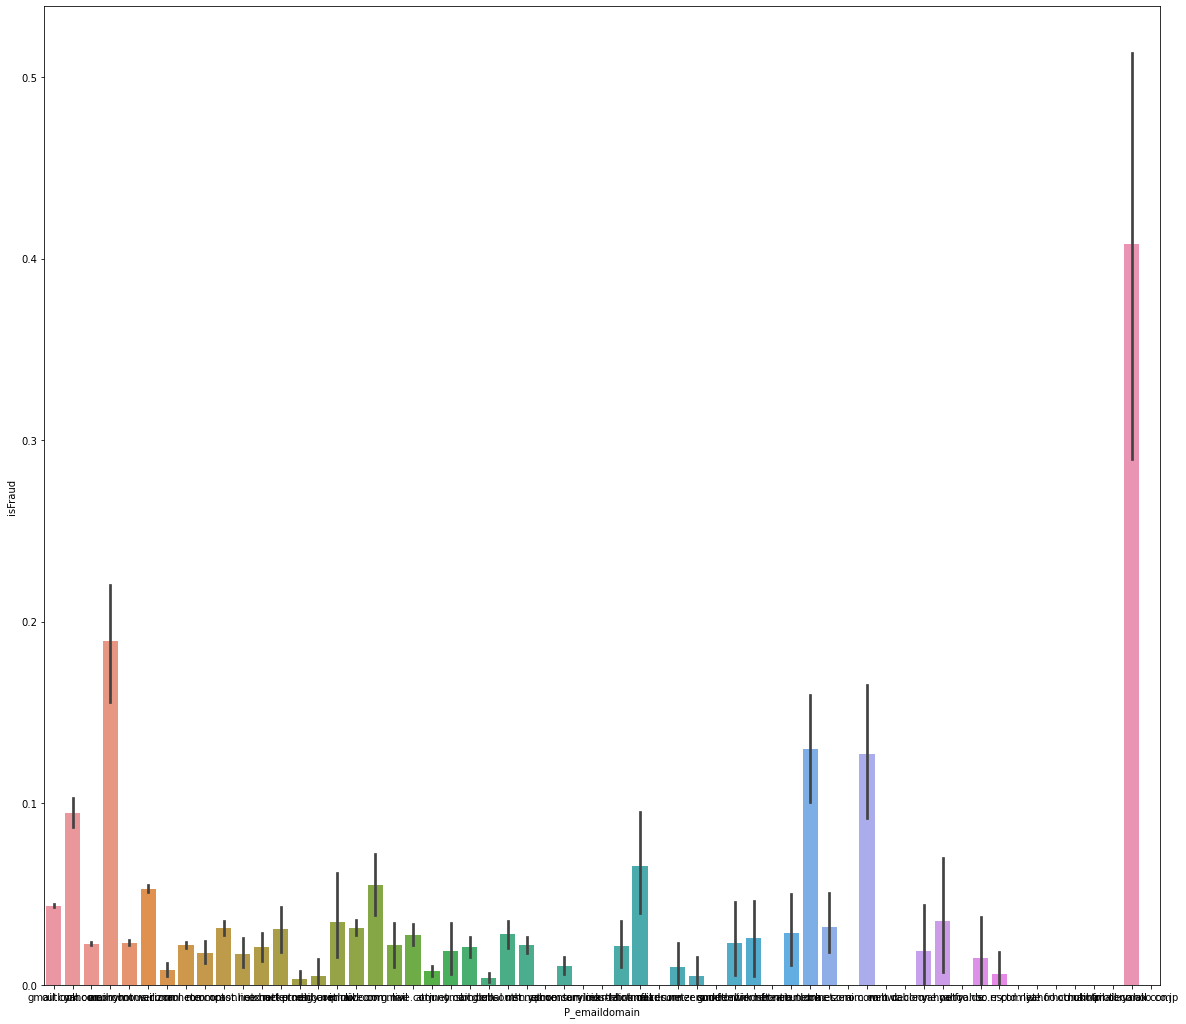

In [27]:
plt.figure(figsize=(20, 18))
sns.barplot(x='P_emaildomain', y='isFraud', data=train)

In [28]:
# Skewed -> median
# Not Skewed -> mean

Replacing the null values with Unknown to make categorical encoding to draw the distplot

In [29]:
train['P_emaildomain'] = train['P_emaildomain'].fillna('unknown')

['aim.com' 'anonymous.com' 'aol.com' 'att.net' 'bellsouth.net'
 'cableone.net' 'centurylink.net' 'cfl.rr.com' 'charter.net' 'comcast.net'
 'cox.net' 'earthlink.net' 'embarqmail.com' 'frontier.com'
 'frontiernet.net' 'gmail' 'gmail.com' 'gmx.de' 'hotmail.co.uk'
 'hotmail.com' 'hotmail.de' 'hotmail.es' 'hotmail.fr' 'icloud.com'
 'juno.com' 'live.com' 'live.com.mx' 'live.fr' 'mac.com' 'mail.com'
 'me.com' 'msn.com' 'netzero.com' 'netzero.net' 'optonline.net'
 'outlook.com' 'outlook.es' 'prodigy.net.mx' 'protonmail.com' 'ptd.net'
 'q.com' 'roadrunner.com' 'rocketmail.com' 'sbcglobal.net' 'sc.rr.com'
 'servicios-ta.com' 'suddenlink.net' 'twc.com' 'unknown' 'verizon.net'
 'web.de' 'windstream.net' 'yahoo.co.jp' 'yahoo.co.uk' 'yahoo.com'
 'yahoo.com.mx' 'yahoo.de' 'yahoo.es' 'yahoo.fr' 'ymail.com']


<AxesSubplot:ylabel='Density'>

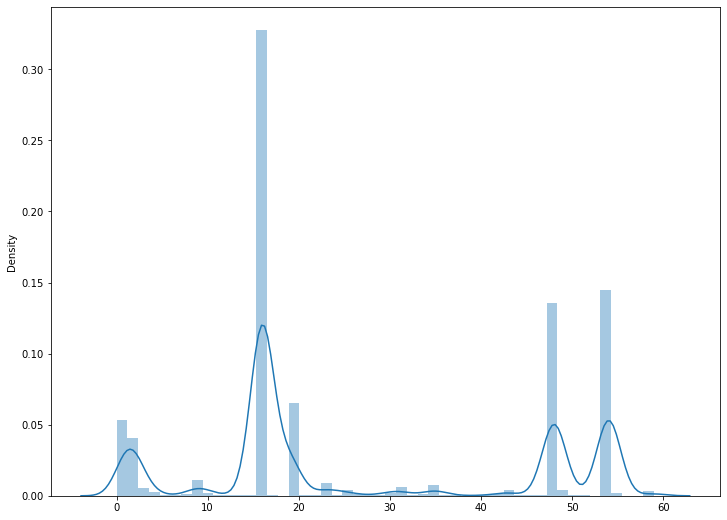

In [30]:
plt.figure(figsize=(12, 9))
le = LabelEncoder()
h = le.fit_transform(train['P_emaildomain'])
print(le.classes_)
sns.distplot(h)

In [31]:
train['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
unknown              94456
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
windstream.net         305
roadrunner.com         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
t

In [32]:
# TODO Handle P_EmailDomain

### V's

In [33]:
missing_vs = getnulls(train)
missing_vs.T

,V89,V84,V77,V78,V79,V80,V81,V82,V83,V85,V75,V86,V87,V88,V90,V91,V92,V93,V76,V94,D15,V70,V62,V53,V54,V55,V56,V57,V58,V59,V60,V61,V63,V71,V64,V65,V66,V67,V68,V69,V74,V73,V72,V32,V33,V34,V30,V15,V25,V24,V23,V22,V21,V20,V27,V19,V18,V17,V31,V28,V16,V14,V13,V12,V29,V26,D10,addr2,addr1,card2,card5,card4,card6,card3,V288,V283,V282,V281,V300,V289,V296,V301,D1,V313,V314,V315,V134,V137,V133,V114,V135,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V115,V113,V136,V112,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V116,V321,V320,V302,V311,V312,V316,V317,V318,V319,V279,V309,V308,V307,V306,V305,V303,V304,V299,V298,V280,V284,V285,V286,V287,V290,V291,V292,V293,V294,V295,V297,V310,TransactionDT,isFraud,TransactionAmt,ProductCD,card1,P_emaildomain,C12,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C13,C14,TransactionID
total,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89113.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,77096.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76073.000000,76022.000000,65706.000000,65706.000000,8933.000000,4259.000000,1577.00000,1571.00000,1565.00000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150901,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.130552,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128819,0.128733,0.111264,0.111264,0.015127,0.007212,0.00267,0.00266,0.00265,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.00002,0.00002,0.

In [34]:
nulls_at_vs = train[train['V89'].isnull()]
nulls_at_vs

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,anonymous.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2987016,0,86620,30.0,H,1790,555.0,150.0,visa,226.0,debit,170.0,87.0,aol.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,2987017,0,86668,100.0,H,11492,111.0,150.0,mastercard,219.0,credit,204.0,87.0,yahoo.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2987022,0,86786,50.0,H,1724,583.0,150.0,visa,226.0,credit,299.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0

It will be good if we drop all these rows, cuz all of these columns has null values at the same rows

In [35]:
print(train['isFraud'].value_counts()) # check if the 1 values is gonna be much lower
print(train.shape)
train.drop(nulls_at_vs.index, axis=0, inplace=True)
print(train['isFraud'].value_counts())
print(train.shape)

0    569877
1     20663
Name: isFraud, dtype: int64
(590540, 182)
0    484989
1     16387
Name: isFraud, dtype: int64
(501376, 182)


In [36]:
missing_vs = getnulls(train)
missing_vs.T

,addr2,addr1,card2,V65,V56,V57,V74,V71,V70,V69,V68,V67,V66,V73,V53,V72,V64,V63,V62,V61,V60,V59,V58,V54,V55,V18,V13,V15,V16,V17,V28,V19,V20,V21,V22,V23,V24,V14,V25,V12,V26,V27,V34,V29,V33,V32,V31,V30,D10,card5,card4,card6,card3,V315,V314,V313,D1,V296,V301,V281,V282,V283,V288,V289,V300,V99,V103,V101,V100,V96,V98,V97,V95,V105,V104,V102,V106,V107,V137,V136,V135,V134,V133,V132,V131,V130,V129,V128,V127,V125,V124,V123,V122,V121,V120,V119,V118,V117,V116,V115,V114,V113,V112,V111,V110,V109,V108,V126,V321,V294,V295,V287,V290,V291,V292,V293,V308,V297,V307,V298,V299,V302,V303,V304,V305,V286,V285,V284,V280,V279,V309,V310,V311,V312,V316,V317,V320,V318,V319,V306,C7,C8,C9,C6,C5,C11,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,P_emaildomain,C1,C2,C3,C4,C10,V89,C12,C13,V94,V93,V92,V91,V90,V88,V87,V86,V85,V84,V83,V82,V81,V80,V79,V78,V77,V76,V75,D15,C14,TransactionID
total,61702.000000,61702.000000,8430.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5497.000000,3697.000000,1554.000000,1554.000000,1554.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.123065,0.123065,0.016814,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.010964,0.007374,0.003099,0.003099,0.003099,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [37]:
missing_data_test = getnulls(test)
missing_data_test.T

,P_emaildomain,addr2,addr1,V71,V70,V69,V68,V67,V66,V65,V58,V63,V64,V73,V62,V61,V60,V59,V53,V54,V55,V56,V72,V57,V74,V16,V18,V20,V21,V22,V23,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V17,V19,V15,V14,V12,V13,V24,D10,V88,V94,V81,V82,V83,V84,V76,V77,V93,V87,V92,V86,V78,V89,V75,V85,V91,V90,V79,V80,D15,card2,V282,V296,V315,V314,V313,V283,V281,V300,V301,V288,V289,D1,C13,card5,card4,card6,card3,C10,C1,C14,C2,C9,C3,C4,C5,C6,C12,C11,C8,C7,V321,V320,V304,V299,V298,V297,V295,V294,V293,V292,V291,V290,V287,V286,V285,V284,V280,V279,V302,V303,V317,V306,V307,V308,V309,V310,V311,V312,V316,V305,V318,V319,TransactionDT,V136,V137,V134,TransactionAmt,ProductCD,card1,V135,V133,V95,V104,V111,V110,V109,V108,V107,V106,V105,V103,V113,V102,V101,V100,V99,V98,V97,V96,V112,V114,V132,V124,V131,V130,V129,V128,V127,V126,V125,V123,V115,V122,V121,V120,V119,V118,V117,V116,TransactionID
total,69192.000000,65609.000000,65609.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12545.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12069.000000,8654.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,4748.000000,4547.000000,3086.00000,3007.000000,3002.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.136557,0.129485,0.129485,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024759,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023819,0.017079,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.009371,0.008974,0.00609,0.005935,0.005925,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### address

#### addr2

In [38]:
train['addr2'].value_counts()

87.0     436295
60.0       2982
96.0        127
16.0         41
31.0         40
32.0         32
26.0         20
27.0         19
65.0         13
19.0         11
59.0         11
34.0         10
29.0          7
13.0          7
102.0         6
71.0          6
72.0          5
21.0          5
88.0          5
24.0          3
61.0          3
101.0         3
40.0          3
78.0          2
66.0          2
69.0          2
23.0          2
98.0          2
15.0          1
30.0          1
73.0          1
83.0          1
36.0          1
14.0          1
22.0          1
43.0          1
18.0          1
25.0          1
Name: addr2, dtype: int64

In [39]:
test['addr2'].value_counts()

87.0    435934
60.0      4041
96.0       608
32.0        61
65.0        49
         ...  
80.0         1
85.0         1
18.0         1
42.0         1
77.0         1
Name: addr2, Length: 72, dtype: int64

In [40]:
train['addr2'].mean()

86.78866

<AxesSubplot:xlabel='addr2', ylabel='Density'>

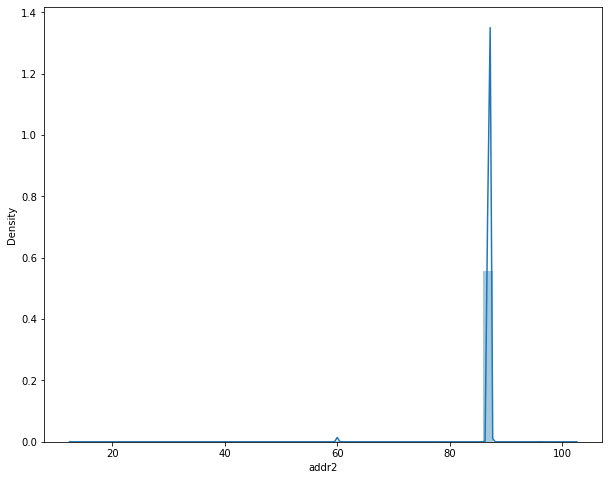

In [41]:
plt.figure(figsize=(10, 8))
sns.distplot(train['addr2'])

<AxesSubplot:xlabel='addr2', ylabel='Density'>

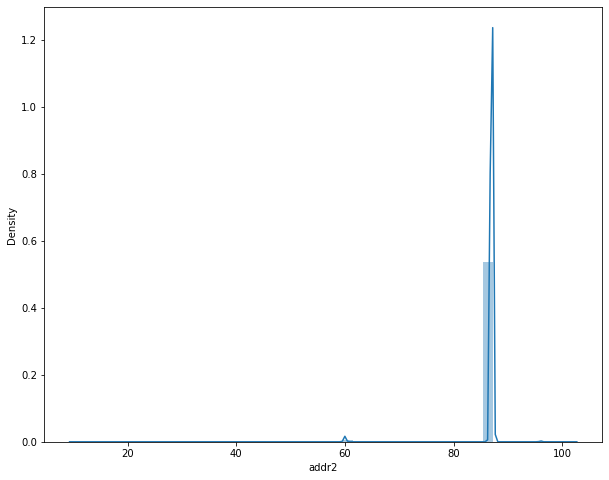

In [42]:
plt.figure(figsize=(10, 8))
sns.distplot(test['addr2'])

<AxesSubplot:xlabel='addr2', ylabel='isFraud'>

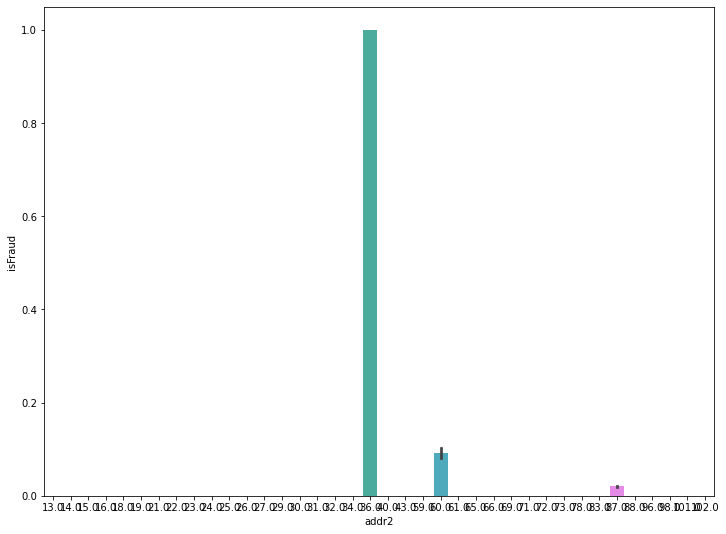

In [43]:
plt.figure(figsize=(12, 9))
sns.barplot(x=train['addr2'], y=train['isFraud'])

In [44]:
print(train.shape, test.shape)
train.drop(['addr2'], axis=1, inplace=True)
test.drop(['addr2'], axis=1, inplace=True)
print(train.shape, test.shape)

(501376, 182) (506691, 181)
(501376, 181) (506691, 180)


#### addr1

<AxesSubplot:xlabel='addr1', ylabel='Density'>

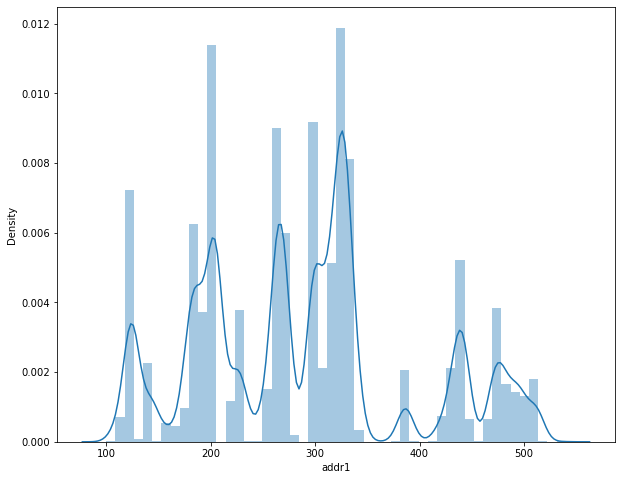

In [45]:
plt.figure(figsize=(10, 8))
sns.distplot(train['addr1'])

<AxesSubplot:xlabel='addr1', ylabel='Density'>

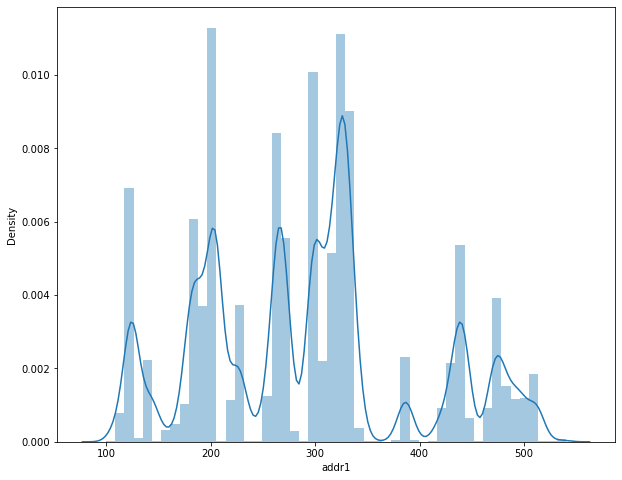

In [46]:
plt.figure(figsize=(10, 8))
sns.distplot(test['addr1'])

In [47]:
train['addr1'].value_counts()

325.0    37162
204.0    35724
299.0    35468
264.0    34795
315.0    19884
         ...  
255.0        1
185.0        1
323.0        1
316.0        1
233.0        1
Name: addr1, Length: 326, dtype: int64

In [48]:
train['addr1'] = train['addr1'].fillna(train['addr1'].mean())
test['addr1'] = test['addr1'].fillna(train['addr1'].mean())

### Cards

#### card1

In [49]:
missing_data_train = getnulls(train)
missing_data_train.T

,card2,V73,V66,V56,V57,V72,V71,V70,V69,V68,V67,V65,V53,V74,V64,V63,V62,V61,V60,V59,V58,V54,V55,V26,V24,V12,V13,V14,V15,V16,V17,V27,V19,V20,V21,V22,V23,V18,V29,V31,V30,V28,V25,V34,V33,V32,D10,card5,card4,card6,card3,V313,V315,V296,D1,V314,V283,V282,V288,V300,V301,V281,V289,V100,V104,V103,V101,V97,V99,V98,V96,V95,V106,V105,V102,V107,V123,V137,V136,V135,V134,V133,V132,V131,V130,V129,V128,V126,V125,V124,V122,V108,V121,V120,V119,V118,V117,V116,V115,V114,V113,V112,V111,V110,V109,V127,V321,V292,V280,V302,V299,V298,V297,V295,V294,V293,V305,V291,V290,V287,V286,V285,V284,V279,V304,V306,V307,V308,V309,V310,V320,V311,V312,V316,V317,V318,V319,V303,C8,C9,C7,C6,C11,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,addr1,P_emaildomain,C1,C2,C3,C4,C5,C10,V90,C12,C13,V94,V93,V92,V91,V89,V88,V87,V86,V85,V84,V83,V82,V81,V80,V79,V78,V77,V76,V75,D15,C14,TransactionID
total,8430.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5497.000000,3697.000000,1554.000000,1554.000000,1554.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.016814,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.012422,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.011014,0.010964,0.007374,0.003099,0.003099,0.003099,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.001637,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000461,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
missing_data_test = getnulls(test)
missing_data_test.T

,P_emaildomain,V63,V71,V70,V69,V68,V67,V66,V65,V58,V64,V73,V62,V61,V60,V59,V53,V54,V55,V56,V72,V57,V74,V27,V20,V21,V22,V23,V24,V26,V28,V17,V29,V30,V31,V32,V33,V34,V18,V19,V25,V16,V15,V14,V13,V12,D10,V79,V83,V84,V85,V86,V76,V77,V78,V88,V94,V89,V92,V87,V91,V75,V80,V93,V90,V81,V82,D15,card2,V282,V283,V288,V289,D1,V296,V313,V314,V300,V301,V315,V281,C13,card5,card4,card6,card3,C2,C1,C7,C3,C4,C5,C6,C9,C10,C11,C12,C14,C8,V321,V320,V304,V299,V298,V297,V295,V294,V293,V292,V291,V290,V287,V286,V285,V284,V280,V279,V302,V303,V305,V311,V319,V318,V317,V312,V316,V310,V309,V308,V307,V306,addr1,V95,card1,ProductCD,TransactionAmt,TransactionDT,V137,V136,V135,V134,V133,V104,V111,V110,V109,V108,V107,V106,V105,V103,V113,V102,V101,V100,V99,V98,V97,V96,V112,V114,V132,V124,V131,V130,V129,V128,V127,V126,V125,V123,V115,V122,V121,V120,V119,V118,V117,V116,TransactionID
total,69192.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12589.000000,12545.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12081.000000,12069.000000,8654.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,4748.000000,4547.000000,3086.00000,3007.000000,3002.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.136557,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024846,0.024759,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023843,0.023819,0.017079,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.009371,0.008974,0.00609,0.005935,0.005925,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
train['card1'].value_counts()

7919     14214
9500     12990
15885     9846
17188     9147
15066     6645
         ...  
2778         1
5169         1
13302        1
9015         1
8897         1
Name: card1, Length: 11322, dtype: int64

<AxesSubplot:ylabel='Density'>

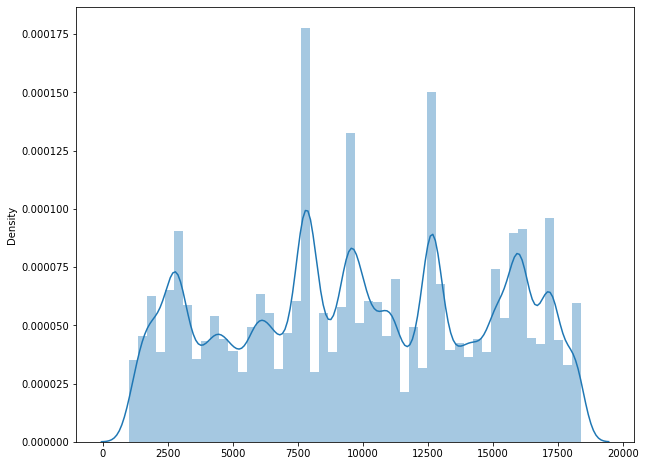

In [52]:
plt.figure(figsize=(10, 8))
sns.distplot(x=train['card1'])

In [53]:
train['card1'] = train['card1'].fillna(train['card1'].mean())
test['card1'] = test['card1'].fillna(train['card1'].mean())

#### card2

In [54]:
train['card2'].value_counts()

321.0    43073
111.0    38761
555.0    36114
490.0    33921
194.0    16067
         ...  
557.0       35
153.0       33
125.0       14
473.0       11
582.0        6
Name: card2, Length: 500, dtype: int64

<AxesSubplot:ylabel='Density'>

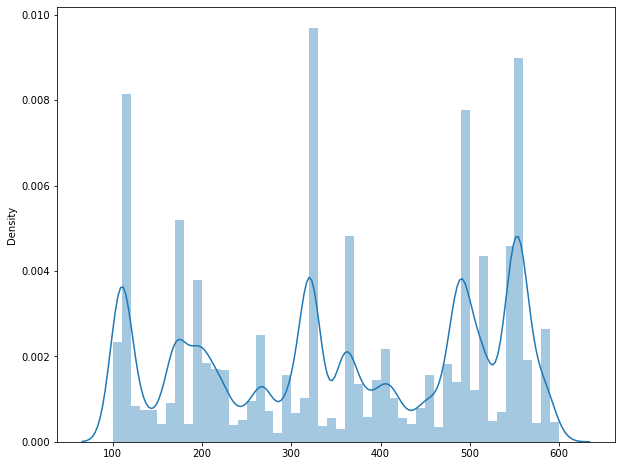

In [55]:
plt.figure(figsize=(10, 8))
sns.distplot(x=train['card2'])

<AxesSubplot:ylabel='Density'>

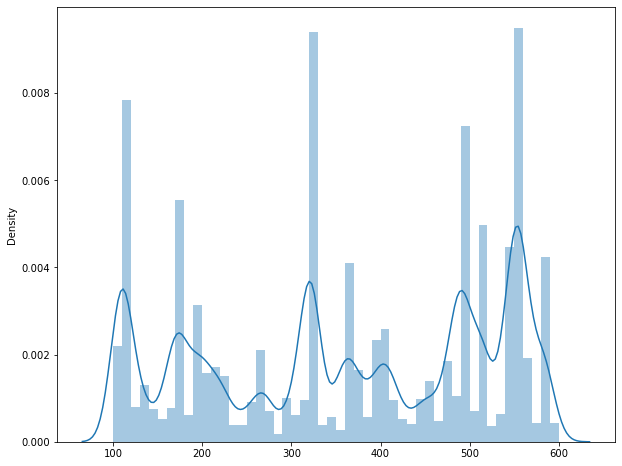

In [56]:
plt.figure(figsize=(10, 8))
sns.distplot(x=test['card2'])

In [57]:
train['card2'] = train['card2'].fillna(train['card2'].mean())
test['card2'] = test['card2'].fillna(train['card2'].mean())

#### card3

In [58]:
train['card3'].value_counts()

150.0    437070
185.0     53219
106.0      1446
146.0      1120
143.0       851
          ...  
208.0         1
155.0         1
206.0         1
205.0         1
172.0         1
Name: card3, Length: 101, dtype: int64

<AxesSubplot:ylabel='Density'>

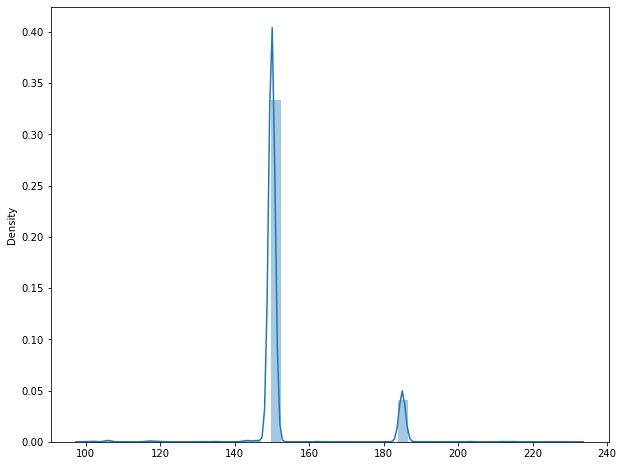

In [59]:
plt.figure(figsize=(10, 8))
sns.distplot(x=train['card3'])

<AxesSubplot:ylabel='Density'>

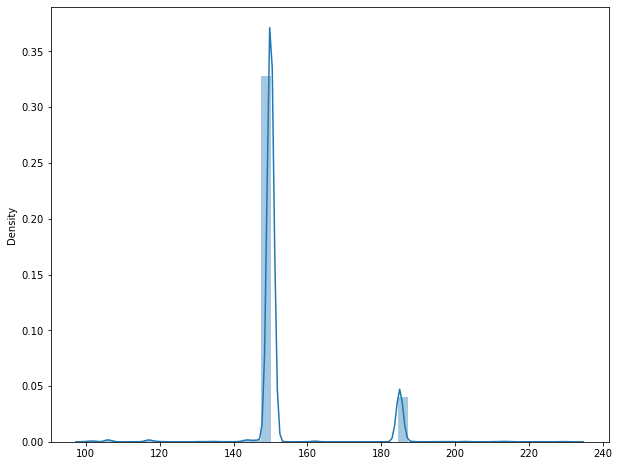

In [60]:
plt.figure(figsize=(10, 8))
sns.distplot(x=test['card3'])

In [61]:
train['card3'] = train['card3'].fillna(train['card3'].mean())
test['card3'] = test['card3'].fillna(train['card3'].mean())

#### card4

In [76]:
print(train['card4'].value_counts())
print(test['card4'].value_counts())

visa                327736
mastercard          166323
discover              4616
american express      1147
Name: card4, dtype: int64
visa                334882
mastercard          158169
american express      7681
discover              2873
Name: card4, dtype: int64


<AxesSubplot:xlabel='card4', ylabel='isFraud'>

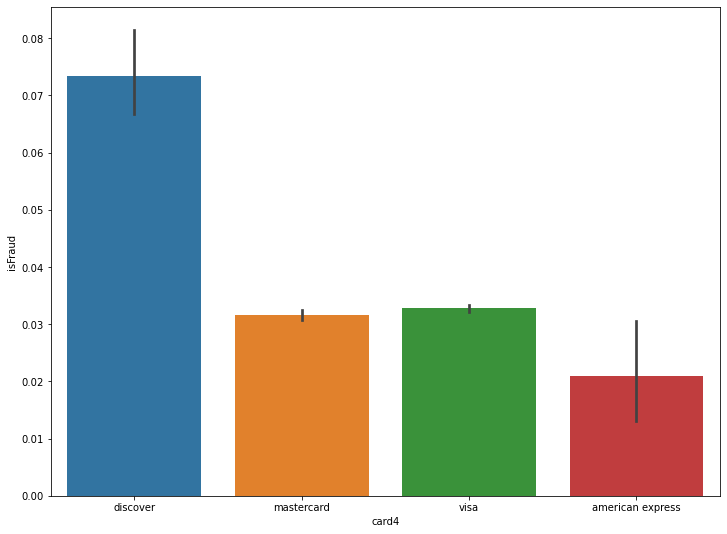

In [64]:
plt.figure(figsize=(12, 9))
sns.barplot(x='card4', y='isFraud', data=train)

In [95]:
null_card4 = train[train['card4'].isnull()]
print(null_card4['isFraud'].value_counts())

0    1515
1      39
Name: isFraud, dtype: int64


In [97]:
train['card4'] = train['card4'].fillna(train['card4'].mode()[0])
test['card4'] = test['card4'].fillna(train['card4'].mode()[0])

#### card 5

In [98]:
train['card5'].value_counts()

226.0    249845
224.0     74182
166.0     53962
117.0     23667
102.0     21923
          ...  
221.0         1
169.0         1
165.0         1
140.0         1
128.0         1
Name: card5, Length: 98, dtype: int64

<AxesSubplot:xlabel='card5', ylabel='Density'>

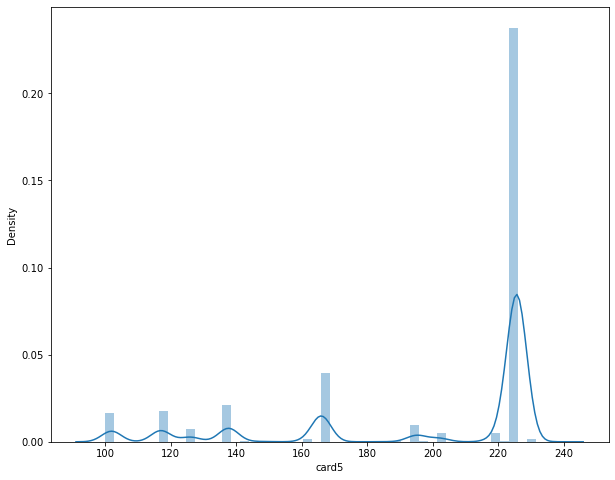

In [100]:
plt.figure(figsize=(10, 8))
sns.distplot(train['card5'])

In [102]:
print(train['card5'].mean())
print(test['card5'].mean())

199.35966
200.163


In [103]:
train['card5'] = train['card5'].fillna(train['card5'].mean())
test['card5'] = test['card5'].fillna(train['card5'].mean())

#### card6

In [65]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,358.188568,150.0,discover,142.0,credit,315.0,unknown,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.000000,150.0,mastercard,102.0,credit,325.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.000000,150.0,visa,166.0,debit,330.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.000000,150.0,mastercard,117.0,debit,476.0,yahoo.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,1758.0,925.0,0.0,354.0,135.0,50.0,1404.0,790.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.000000,150.0,visa,

# EDA

## TransactionDT --> timedelta from a given reference datetime (not an actual timestamp)